<h1>Informe sobre Machine Learning - Redes neuronales</h1>
<b>Integrante: </b>
<li> Maria Paula Mosquera Rengifo - 2110324


Imports

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import warnings
from google.colab import files
import io
from sklearn.model_selection import train_test_split

Leer el archivo CO2 emissions.csv.

In [ ]:
uploaded = files.upload()
datos = pd.read_csv('CO2 emissions.csv')
datos.columns = ["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY", "CO2EMISSIONS"]
datos.info()

Saving CO2 emissions.csv to CO2 emissions.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ENGINESIZE            1067 non-null   float64
 1   CYLINDERS             1067 non-null   int64  
 2   FUELCONSUMPTION_CITY  1067 non-null   float64
 3   FUELCONSUMPTION_HWY   1067 non-null   float64
 4   CO2EMISSIONS          1067 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 41.8 KB


Pruebas de verificación de datos

In [ ]:
#Atributos Cuantitativos Enteros
datos.select_dtypes(include=["int64"]).describe()

,CYLINDERS,CO2EMISSIONS
count,1067.000000,1067.000000
mean,5.794752,0.461106
std,1.797447,0.498719
min,3.000000,0.000000
25%,4.000000,0.000000
50%,6.000000,0.000000
75%,8.000000,1.000000
max,12.000000,1.000000


In [ ]:
#Atributos Cuantitativos Reales
datos.select_dtypes(include=["float64"]).describe()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
count,1067.000000,1067.000000,1067.000000
mean,3.346298,13.296532,9.474602
std,1.415895,4.101253,2.794510
min,1.000000,4.600000,4.900000
25%,2.000000,10.250000,7.500000
50%,3.400000,12.600000,8.800000
75%,4.300000,15.550000,10.850000
max,8.400000,30.200000,20.500000


Se separan los datos de entrenamiento de los datos de prueba. Un 80% para entrenar, un 20% para probar.

In [ ]:
longitud = len(datos)
datosEntrenar = int(longitud*0.8)
datosPrueba = longitud - datosEntrenar
dataToTrain, dataToTest = sklearn.model_selection.train_test_split(datos, train_size=datosEntrenar, test_size=datosPrueba)
dataToTrain.shape
dataToTrain.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS
452,6.0,8,30.2,20.5,1
523,1.6,4,9.1,6.7,0
1014,1.8,4,9.5,7.2,0
978,1.8,4,9.4,7.5,0
165,3.6,6,12.9,8.2,0


#Creación de Pipeline

---



Imports

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

Pipeline para normalizar atributos numéricos

In [ ]:
atributosNumericos = ["ENGINESIZE","CYLINDERS","FUELCONSUMPTION_CITY","FUELCONSUMPTION_HWY"]
numericosPipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("scalerNumerico", StandardScaler())
])

#Pipeline Completo

In [ ]:
pipelineCompleto = ColumnTransformer([
    ("numericos", numericosPipeline, atributosNumericos)
])
entrenamientoX = pipelineCompleto.fit_transform(dataToTrain)
entrenamientoX.shape
entrenamientoY = dataToTrain["CO2EMISSIONS"]
entrenamientoX[0,:]

array([1.91575964, 1.24941804, 4.05736364, 3.89572461])

Gracias al pipeline quedamos con 4 valores posibles de los cuales los 4 son númericos.


#Entrenamos las redes neuronales
Creamos 5 modelos a trabajar

Imports

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error

## Modelo 1:
Características:
*   Método de activación: Identity
*   Solver: adam
*   Alpha: 0.0001
*   Cantidad de capas y neuronas por cada: (4,4,4,4)


In [ ]:
modelo1 = MLPClassifier(activation='identity',solver='adam', alpha=1e-4,hidden_layer_sizes=(4,4,4,4), random_state=123)
modelo1.fit(entrenamientoX,entrenamientoY)

MLPClassifier(activation='identity', hidden_layer_sizes=(4, 4, 4, 4),
              random_state=123)

## Modelo 2:
Características:
*   Método de activación: Identity
*   Solver: adam
*   Alpha: 0.0001
*   Cantidad de capas y neuronas por cada: (7,10,4)

In [ ]:
modelo2 = MLPClassifier(activation='identity',solver='adam', alpha=1e-4,hidden_layer_sizes=(7,10,4), random_state=123)
modelo2.fit(entrenamientoX,entrenamientoY)

MLPClassifier(activation='identity', hidden_layer_sizes=(7, 10, 4),
              random_state=123)

## Modelo 3:
Características:
*   Método de activación: Logistic
*   Solver: sgd
*   Alpha: 0.0001
*   Cantidad de capas y neuronas por cada: (4,3,10)



In [ ]:
modelo3 = MLPClassifier(activation='logistic',solver='sgd', alpha=1e-4,hidden_layer_sizes=(4,3,10), random_state=123)
modelo3.fit(entrenamientoX,entrenamientoY)

MLPClassifier(activation='logistic', hidden_layer_sizes=(4, 3, 10),
              random_state=123, solver='sgd')

## Modelo 4:
Características:
*   Método de activación: relu
*   Solver: lbfgs
*   Alpha: 0.000001
*   Cantidad de capas y neuronas por cada: (10,3,5,5,5)

In [ ]:
modelo4 = MLPClassifier(activation='relu',solver='lbfgs', alpha=1e-6,hidden_layer_sizes=(10,3,5,5,5), random_state=123)
modelo4.fit(entrenamientoX,entrenamientoY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-06, hidden_layer_sizes=(10, 3, 5, 5, 5),
              random_state=123, solver='lbfgs')

## Modelo 5
Características:
*   Método de activación: tanh
*   Solver: adam
*   Alpha: 0.00001
*   Cantidad de capas y neuronas por cada: (5,6,7,8)

In [ ]:
modelo5 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(5,6,7,8), random_state=123)
modelo5.fit(entrenamientoX,entrenamientoY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(5, 6, 7, 8),
              random_state=123)

Ejecutamos los modelos en el conjunto de pruebas

In [ ]:
datosPrueba = pipelineCompleto.transform(dataToTest)
prediccion1 = modelo1.predict(datosPrueba)
prediccion2 = modelo2.predict(datosPrueba)
prediccion3 = modelo3.predict(datosPrueba)
prediccion4 = modelo4.predict(datosPrueba)
prediccion5 = modelo5.predict(datosPrueba)

Prints para los valores de las predicciones

In [ ]:
# prediccion1
# prediccion2
# prediccion3
# prediccion4
prediccion5

array([1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1])

Probando los modelos

In [ ]:
test = dataToTest["CO2EMISSIONS"]
test

834    1
121    1
414    0
211    1
620    1
      ..
923    1
899    0
519    0
192    1
346    1
Name: CO2EMISSIONS, Length: 214, dtype: int64

# Tabla de accuracy y la matriz de confusión

Precisión del modelo 1: 0.9719626168224299
Precisión del modelo 2: 0.9579439252336449
Precisión del modelo 3: 0.5373831775700935
Precisión del modelo 4: 0.9766355140186916
Precisión del modelo 5: 0.985981308411215
Matriz de Confusión para modelo 5


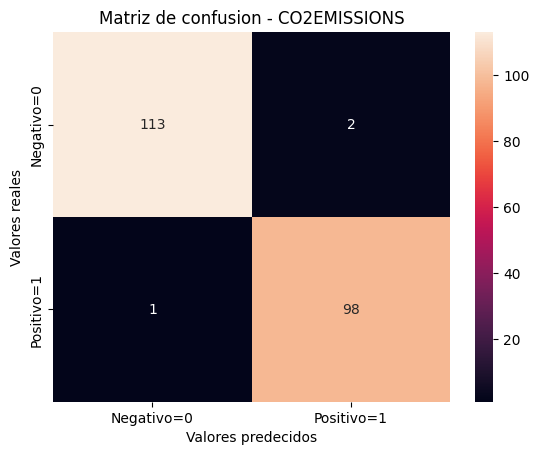



|   Modelo |   Accuracy |
|---------:|-----------:|
|        1 |   0.971963 |
|        2 |   0.957944 |
|        3 |   0.537383 |
|        4 |   0.976636 |
|        5 |   0.985981 |


In [82]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tabulate import tabulate

accuracy1 = accuracy_score(test, prediccion1)
accuracy2 = accuracy_score(test, prediccion2)
accuracy3 = accuracy_score(test, prediccion3)
accuracy4 = accuracy_score(test, prediccion4)
accuracy5 = accuracy_score(test, prediccion5)

print("Precisión del modelo 1:", accuracy1)
print("Precisión del modelo 2:", accuracy2)
print("Precisión del modelo 3:", accuracy3)
print("Precisión del modelo 4:", accuracy4)
print("Precisión del modelo 5:", accuracy5)

matrizConfusion1 = confusion_matrix(test, prediccion1)
matrizConfusion2 = confusion_matrix(test, prediccion2)
matrizConfusion3 = confusion_matrix(test, prediccion3)
matrizConfusion4 = confusion_matrix(test, prediccion4)
matrizConfusion5 = confusion_matrix(test, prediccion5)

matriz = plt.subplot()
#sns.heatmap(matrizConfusion1, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion2, annot=True, ax = matriz, fmt='d')
#sns.heatmap(matrizConfusion3, annot=True, ax = matriz, fmt='d')
# sns.heatmap(matrizConfusion4, annot=True, ax = matriz, fmt='d')
sns.heatmap(matrizConfusion5, annot=True, ax = matriz, fmt='d')

matriz.set_xlabel("Valores predecidos")
matriz.set_ylabel("Valores reales")
matriz.set_title("Matriz de confusion - CO2EMISSIONS")
matriz.xaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])
matriz.yaxis.set_ticklabels(['Negativo=0', 'Positivo=1'])

#print("Matriz de Confusión para modelo 1")
#print("Matriz de Confusión para modelo 2")
#print("Matriz de Confusión para modelo 3")
# print("Matriz de Confusión para modelo 4")
print("Matriz de Confusión para modelo 5")
plt.show()

# Crear el DataFrame con los valores de accuracy
accuracy_values = [accuracy1, accuracy2, accuracy3, accuracy4, accuracy5]
df_accuracy = pd.DataFrame({"Modelo": range(1, 6), "Accuracy": accuracy_values})

# Imprimir la tabla
tabla = tabulate(df_accuracy, headers="keys", tablefmt="pipe", showindex=False)
print("\n")
print(tabla)

Hiperparámetros con el mayor accuracy:
Características:
*   Método de activación: tanh
*   Solver: adam
*   Alpha: 0.00001
*   Cantidad de capas y neuronas por cada: (5,6,7,8)

Se utilizó en el modelo 5.

# Variaciones
Se utilizará los hiperparámetros en el modelo 4 que se creó pero se variará el solver, alpha y random_state.

In [ ]:
modeloVariacion1 = MLPClassifier(activation='tanh',solver='sgd', alpha=1e-5,hidden_layer_sizes=(5,6,7,8), random_state=12)
modeloVariacion1.fit(entrenamientoX,entrenamientoY)
prediccionVariacion1 = modeloVariacion1.predict(datosPrueba)
prueba = dataToTest["CO2EMISSIONS"]
accuracyVariacion1 = accuracy_score(prueba, prediccionVariacion1)
print("El accuracy de la variación 1 es: ", accuracyVariacion1)

modeloVariacion2 = MLPClassifier(activation='tanh',solver='adam', alpha=1e-5,hidden_layer_sizes=(5,6,7,8), random_state=12)
modeloVariacion2.fit(entrenamientoX,entrenamientoY)
prediccionVariacion2 = modeloVariacion2.predict(datosPrueba)
accuracyVariacion2 = accuracy_score(prueba, prediccionVariacion2)
print("El accuracy de la variación 2 es: ", accuracyVariacion2)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


El accuracy de la variación 1 es:  0.9672897196261683
El accuracy de la variación 2 es:  0.9953271028037384


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#Análisis
Despues de tomar el modelo 5 que tuvo un accuracy de 0.985981 y modificarlo, se encontró que al modificar el solver al método de sgd y adam nos dá precisiones de 0.967289 y 0.995327 respectivamente.

Teniendo en cuenta todos los modelos, se puede concluir que:

*   La variación 2 fue la que mejor accuracy tuvo:  0.995327.
*   La función de activación de mejor precisión es tanh.
*   Entre menor sea en random_state, mayor es el acurracy, si lo ponemos en 10, nos da valores más cercanos a 1.
*   El alfa no afecta mucho en el accuracy a comparación con los otros hiperparámetros.

